In [1]:
#kütüphaneler
import numpy as np
from sympy import *
from sympy.geometry import *
import math
import matplotlib.pyplot as plt
import skfuzzy as fuzz
import skfuzzy.membership as mf
from skfuzzy import control as ctrl
from scipy.optimize import least_squares

In [2]:
#Access Pointlerin koordinatları
x1=0
x2=9.5
x3=5
y1=0
y2=5
y3=8.5

In [3]:
#RSSI aralığı
x_rssi = np.arange(-120,0,1)

In [29]:
#Ölçülen RSSI Değerleri
rssi_input_1=-65
rssi_input_2=-65
rssi_input_3=-54

In [30]:
#Ölçülen RSSI değerine göre mesafeyi döndüren fonksiyon
def distance_measure(rssi):
    if -17 <= rssi <= 0:
        distance = 0
    elif -22 < rssi <= -17:
        distance = 0.5
    elif -26 <= rssi <= -22:
        distance = 1
    elif -30 < rssi <= -26:
        distance = 1.5
    elif -37 <= rssi <= -30:
        distance = 2
    elif -40 < rssi <= -37:
        distance = 2.5
    elif -45 <= rssi <= -40:
        distance = 3
    elif -48 < rssi <= -45:
        distance = 3.5
    elif -51 <= rssi <= -48:
        distance = 4
    elif -53 < rssi <= -51:
        distance = 4.5
    elif -57 <= rssi <= -53:
        distance = 5
    elif -61 < rssi <= -57:
        distance = 5.5
    elif -66 <= rssi <= -61:
        distance = 6
    elif -69 < rssi <= -66:
        distance = 6.5
    elif -73 <= rssi <= -69:
        distance = 7
    elif -76 < rssi <= -73:
        distance = 7.5
    elif -80 <= rssi <= -76:
        distance = 8
    elif -82 < rssi <= -80:
        distance = 8.5
    elif -85 <= rssi <= -82:
        distance = 9
    elif -89 < rssi <= -85:
        distance = 9.5
    elif -93 <= rssi <= -89:
        distance = 10
    elif -95 < rssi <= -93:
        distance = 10.5
    elif -99 <= rssi <= -95:
        distance = 11
    elif -103 < rssi <= -99:
        distance = 11.5
    elif -120 <= rssi <= -103:
        distance = 12
    return distance

In [31]:
print (distance_measure(rssi_input_1))
print (distance_measure(rssi_input_2))
print (distance_measure(rssi_input_3))

6
6
5


In [32]:
d1=distance_measure(rssi_input_1)
d2=distance_measure(rssi_input_2)
d3=distance_measure(rssi_input_3)

In [33]:
circle1 = plt.Circle((x1, y1), d1, color='r', fill=0)
circle2 = plt.Circle((x2, y2), d2, color='g', fill=0)
circle3 = plt.Circle((x3, y3), d3, color='b', fill=0)

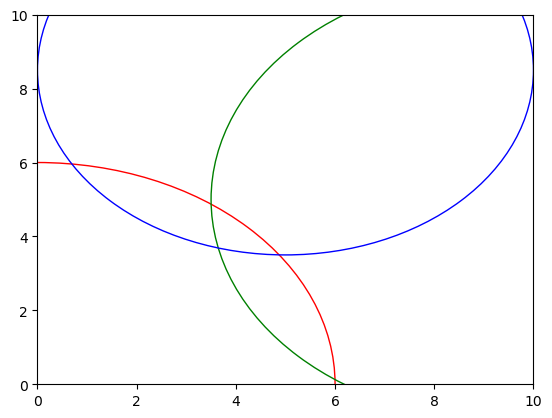

In [34]:
ax = plt.gca()
ax.cla()
ax.set_xlim((0, 10))
ax.set_ylim((0, 10))
ax.add_patch(circle1)
ax.add_patch(circle2)
ax.add_patch(circle3)

In [37]:
#least squares ile varsa kesişim noktasını, yoksa kesişmeye en yakın noktayı buluyoruz
def intersectionPoint(p1,p2,p3):

    def eq(g):
        x, y = g

        return (
            (x - x1)**2 + (y - y1)**2 - d1**2,
            (x - x2)**2 + (y - y2)**2 - d2**2,
            (x - x3)**2 + (y - y3)**2 - d3**2)

    guess = (x1, y1 + d1)

    ans = least_squares(eq, guess, ftol=None, xtol=None)

    return ans

ans = intersectionPoint((x1,y1,d1),(x2,y2,d2),(x3,y3,d3))

In [38]:
print("Kesişim Noktası Koordinatları:", ans.x)

Kesişim Noktası Koordinatları: [3.77181234 4.10049849]


In [1069]:
#Koordinatları atadığımız matrisimizi tanımlayalım
coordinates = np.array([ans.x])

In [1070]:
print (coordinates)

[[7.76708162 8.49898472]]


In [1120]:
# Yeni elemanı tanımlayıp matrise aktarıyoruz
coordinates = np.append(coordinates, [ans.x], axis=0)

In [1121]:
print (coordinates)

[[7.76708162 8.49898472]
 [7.7129649  7.85713938]
 [7.41443319 8.15770192]
 [7.41443319 8.15770192]
 [8.04021866 8.21736015]
 [7.7129649  7.85713938]]


In [1060]:
#Matrisi silmek için:
del coordinates

# Bulanık Mantık Yardımı ile Matrisimizin Ağırlıklı Ortalamasını Alıp Elde Ettiğimiz Sonucun Kesinliğini Arttıralım ve Hataları Ayıklayalım

In [1122]:
# X ve Y değerlerini ayrı ayrı normalize ediyoruz
normalized_x = (coordinates[:, 0] - np.min(coordinates[:, 0])) / (np.max(coordinates[:, 0]) - np.min(coordinates[:, 0]))
normalized_y = (coordinates[:, 1] - np.min(coordinates[:, 1])) / (np.max(coordinates[:, 1]) - np.min(coordinates[:, 1]))

In [1123]:
# Bulanık kümeleri oluşturalım
x_fuzzy = fuzz.trimf(normalized_x, [np.min(normalized_x), np.mean(normalized_x), np.max(normalized_x)])
y_fuzzy = fuzz.trimf(normalized_y, [np.min(normalized_y), np.mean(normalized_y), np.max(normalized_y)])

In [1124]:
# X ve Y bulanık kümelerini birleştirerek tek bir koordinat değeri elde edelim
combined_fuzzy = np.fmax(x_fuzzy, y_fuzzy)

In [1125]:
# Yeni koordinat değerini hesaplalım
combined_coordinate = np.sum(combined_fuzzy * coordinates, axis=0) / np.sum(combined_fuzzy)

In [1126]:
# Sonuç:
print("Hesaplanan Koordinat Değeri:", combined_coordinate)

Hesaplanan Koordinat Değeri: [7.67701608 8.12433791]


### Elde ettiğimiz sonuçları bulanık mantık kullanmadan elde ettiğimiz sonuçlar ile kıyaslayacak olursak rssi değerindeki sapmalar yüzünden konum tespitinde yaşanan bozulmaların azaldığını gözlemleyebiliriz.